In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel('insurance claims.xlsx',engine='openpyxl')

In [4]:
df.head()

,Name,Surname,Age,Gender,Marital_Status,Date_Of_Birth,Sum_Insured,Policies_Revenue,Policy_Start,Policy_End,Fraudulent_Claim_Reason,Date_Of_Loss,Date_Of_Claim,Broker_ID,Insured_ID,Kind_Of_Loss,Claim_Amount,Service_Provider,Policy_Holder_Street,Policy_Holder_Province,Policy_Holder_City,Policy_Holder_Area,Policy_Holder_Postal,Fraudulent_Claim
0,Lenna,Britt,48.0,Female,Widowed,1972-04-11T09:52:23,757809.97,2472.35,2007-12-20T01:53:10,2010-12-20T08:59:34,Claim before Policy start,2010-01-05T14:55:37,1905-12-07 08:21:35,BKR4051,Discovery,Water,212213.66,"Johnson, Rose and Chavez",James Mountain,Kenya,Baileyfort,Nevada,16007,T
1,Melia,Travis,50.0,Male,Married,1970-03-18T09:40:01,6750638.09,1614.29,2012-08-17T15:47:57,2014-04-10T08:39:24,Claim amount is more than Sum Insured,2003-11-06T04:31:33,2007-03-26 04:27:04,BKR8963,Discovery,Natural Disaster,2488934.79,"Jones, Gonzalez and Hensley",Ramirez Bypass,Central African Republic,Johnside,Pennsylvania,72834,T
2,Rayford,Weeks,NaN,Female,Separated,NaN,1055481.09,3842.80,1986-12-07T10:50:36,2010-06-24T02:20:07,No Date of birth,1998-09-27T05:49:06,2007-11-15 05:33:52,BKR5108,Miway,Theft,9095.35,Black PLC,Danny Terrace,Germany,Stephanieville,Massachusetts,13812,T
3,Particia,Paul,79.0,Female,Married,1941-06-15T08:29:12,6067239.19,4210.64,2019-03-21T14:54:21,NaN,No Policy end date,1999-07-24T05:22:38,2013-03-04 00:46:28,BKR7049,First for Woman,Natural Disaster,1998664.60,Morse and Sons,Ronald Glens,Iceland,Port Heatherburgh,Nevada,17076,T
4,Derrick,Valenzuela,75.0,Female,Separated,1945-03-22T01:45:12,8484415.83,3994.97,2004-03-20T06:39:45,1920-06-16T10:32:02,Policy end date before start date,2000-07-20T08:47:52,2011-06-22 04:29:29,BKR8612,Hollard,Natural Disaster,4313932.55,"Krause, Phillips and Mccall",Mary Station,Mozambique,Kevinburgh,Louisiana,99268,T


In [5]:
df.shape
#HolyShit!! Seriously

(100, 24)

In [6]:
df.dtypes

Name                               object
Surname                            object
Age                               float64
Gender                             object
Marital_Status                     object
Date_Of_Birth                      object
Sum_Insured                       float64
Policies_Revenue                  float64
Policy_Start                       object
Policy_End                         object
Fraudulent_Claim_Reason            object
Date_Of_Loss                       object
Date_Of_Claim              datetime64[ns]
Broker_ID                          object
Insured_ID                         object
Kind_Of_Loss                       object
Claim_Amount                      float64
Service_Provider                   object
Policy_Holder_Street               object
Policy_Holder_Province             object
Policy_Holder_City                 object
Policy_Holder_Area                 object
Policy_Holder_Postal                int64
Fraudulent_Claim                  

In [7]:
df.isnull().sum()

Name                        0
Surname                     0
Age                         6
Gender                      0
Marital_Status              0
Date_Of_Birth               6
Sum_Insured                 0
Policies_Revenue            0
Policy_Start                7
Policy_End                 14
Fraudulent_Claim_Reason    16
Date_Of_Loss                0
Date_Of_Claim               7
Broker_ID                   0
Insured_ID                  0
Kind_Of_Loss                0
Claim_Amount                0
Service_Provider            0
Policy_Holder_Street        0
Policy_Holder_Province      0
Policy_Holder_City          0
Policy_Holder_Area          0
Policy_Holder_Postal        0
Fraudulent_Claim            0
dtype: int64

In [8]:
df['Marital_Status'].value_counts()

Married      25
Widowed      21
Separated    19
Single       19
Divorced     16
Name: Marital_Status, dtype: int64

Drop unwanted columns
- Name and Surname doesn't matter
- Service Provider and the many of the geographical features like city and province are unique for all 100 records. So there isn't contribution from them
- Date of Birth doesn't matter
- Broker ID is unique for each record


In [9]:
#Let's Drop them
df.drop(['Name','Surname','Service_Provider','Policy_Holder_City','Policy_Holder_Province','Policy_Holder_Street','Date_Of_Birth','Policy_Holder_Postal','Broker_ID'],axis = 1,inplace = True)

In [10]:
df.shape

(100, 15)

In [11]:
df.head()

,Age,Gender,Marital_Status,Sum_Insured,Policies_Revenue,Policy_Start,Policy_End,Fraudulent_Claim_Reason,Date_Of_Loss,Date_Of_Claim,Insured_ID,Kind_Of_Loss,Claim_Amount,Policy_Holder_Area,Fraudulent_Claim
0,48.0,Female,Widowed,757809.97,2472.35,2007-12-20T01:53:10,2010-12-20T08:59:34,Claim before Policy start,2010-01-05T14:55:37,1905-12-07 08:21:35,Discovery,Water,212213.66,Nevada,T
1,50.0,Male,Married,6750638.09,1614.29,2012-08-17T15:47:57,2014-04-10T08:39:24,Claim amount is more than Sum Insured,2003-11-06T04:31:33,2007-03-26 04:27:04,Discovery,Natural Disaster,2488934.79,Pennsylvania,T
2,NaN,Female,Separated,1055481.09,3842.80,1986-12-07T10:50:36,2010-06-24T02:20:07,No Date of birth,1998-09-27T05:49:06,2007-11-15 05:33:52,Miway,Theft,9095.35,Massachusetts,T
3,79.0,Female,Married,6067239.19,4210.64,2019-03-21T14:54:21,NaN,No Policy end date,1999-07-24T05:22:38,2013-03-04 00:46:28,First for Woman,Natural Disaster,1998664.60,Nevada,T
4,75.0,Female,Separated,8484415.83,3994.97,2004-03-20T06:39:45,1920-06-16T10:32:02,Policy end date before start date,2000-07-20T08:47:52,2011-06-22 04:29:29,Hollard,Natural Disaster,4313932.55,Louisiana,T


In [12]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [13]:
df['Policy_Start'] = pd.to_datetime(df['Policy_Start'])
df['Policy_End'] = pd.to_datetime(df['Policy_End'])

In [14]:
df.dtypes

Age                               float64
Gender                             object
Marital_Status                     object
Sum_Insured                       float64
Policies_Revenue                  float64
Policy_Start               datetime64[ns]
Policy_End                 datetime64[ns]
Fraudulent_Claim_Reason            object
Date_Of_Loss                       object
Date_Of_Claim              datetime64[ns]
Insured_ID                         object
Kind_Of_Loss                       object
Claim_Amount                      float64
Policy_Holder_Area                 object
Fraudulent_Claim                   object
dtype: object

In [15]:
df['Policy_Start'].fillna(0,inplace = True)
df['Policy_End'].fillna(0,inplace = True)

In [ ]:
for i,j in df.iterrows():
    
    if(j['Policy_Start'] !=0 and j['Policy_End'] != 0):
          df.loc[i,'Policy_Tenure'] =  (j['Policy_End'] - j['Policy_Start']) / np.timedelta64(1,'D')         

In [17]:
df

,Age,Gender,Marital_Status,Sum_Insured,Policies_Revenue,Policy_Start,Policy_End,Fraudulent_Claim_Reason,Date_Of_Loss,Date_Of_Claim,Insured_ID,Kind_Of_Loss,Claim_Amount,Policy_Holder_Area,Fraudulent_Claim,Policy_Tenure
0,48.000000,Female,Widowed,757809.97,2472.35,2007-12-20 01:53:10,2010-12-20 08:59:34,Claim before Policy start,2010-01-05T14:55:37,1905-12-07 08:21:35,Discovery,Water,212213.66,Nevada,T,1096.296111
1,50.000000,Male,Married,6750638.09,1614.29,2012-08-17 15:47:57,2014-04-10 08:39:24,Claim amount is more than Sum Insured,2003-11-06T04:31:33,2007-03-26 04:27:04,Discovery,Natural Disaster,2488934.79,Pennsylvania,T,600.702396
2,58.446809,Female,Separated,1055481.09,3842.80,1986-12-07 10:50:36,2010-06-24 02:20:07,No Date of birth,1998-09-27T05:49:06,2007-11-15 05:33:52,Miway,Theft,9095.35,Massachusetts,T,8599.645498
3,79.000000,Female,Married,6067239.19,4210.64,2019-03-21 14:54:21,0,No Policy end date,1999-07-24T05:22:38,2013-03-04 00:46:28,First for Woman,Natural Disaster,1998664.60,Nevada,T,NaN
4,75.000000,Female,Separated,8484415.83,3994.97,2004-03-20 06:39:45,1920-06-16 10:32:02,Policy end date before start date,2000-07-20T08:47:52,2011-06-22 04:29:29,Hollard,Natural Disaster,4313932.55,Louisiana,T,-30592.838692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,38.000000,Male,Divorced,9115840.59,4409.21,2016-10-18 02:53:25,0,No Policy end date,2019-10-16T19:22:01,2019-09-02 08:27:33,Budget,Water,6066577.32,Oklahoma,T,NaN
96,41.000000,Female,Divorced,806991.94,4354.53,2010-08-09 13:40:03,2010-07-07 04:38:57,No kind of loss,2019-04-21T18:23:47,2020-05-28 08:40:46,Absa,Fire,115523.92,Illinois,T,-33.375764
97,99.000000,Female,Married,5837203.85,0.00,2000-11-21 18:28:38,2016-06-21 01:07:40,No premium but has claim,2010-12-05T23:56:17,2012-04-06 02:33:06,Miway,Water,1782179.13,Idaho,T,5690.277106
98,46.000000,Male,Married,1392581.91,1420.40,0,0,No Policy start date,2020-07-08T00:22:25,NaT,Miway,Fire,428687.81,Montana,T,NaN


In [18]:
df['Policy_Tenure'].fillna(0,inplace = True)

In [19]:
df.head()

,Age,Gender,Marital_Status,Sum_Insured,Policies_Revenue,Policy_Start,Policy_End,Fraudulent_Claim_Reason,Date_Of_Loss,Date_Of_Claim,Insured_ID,Kind_Of_Loss,Claim_Amount,Policy_Holder_Area,Fraudulent_Claim,Policy_Tenure
0,48.000000,Female,Widowed,757809.97,2472.35,2007-12-20 01:53:10,2010-12-20 08:59:34,Claim before Policy start,2010-01-05T14:55:37,1905-12-07 08:21:35,Discovery,Water,212213.66,Nevada,T,1096.296111
1,50.000000,Male,Married,6750638.09,1614.29,2012-08-17 15:47:57,2014-04-10 08:39:24,Claim amount is more than Sum Insured,2003-11-06T04:31:33,2007-03-26 04:27:04,Discovery,Natural Disaster,2488934.79,Pennsylvania,T,600.702396
2,58.446809,Female,Separated,1055481.09,3842.80,1986-12-07 10:50:36,2010-06-24 02:20:07,No Date of birth,1998-09-27T05:49:06,2007-11-15 05:33:52,Miway,Theft,9095.35,Massachusetts,T,8599.645498
3,79.000000,Female,Married,6067239.19,4210.64,2019-03-21 14:54:21,0,No Policy end date,1999-07-24T05:22:38,2013-03-04 00:46:28,First for Woman,Natural Disaster,1998664.60,Nevada,T,0.000000
4,75.000000,Female,Separated,8484415.83,3994.97,2004-03-20 06:39:45,1920-06-16 10:32:02,Policy end date before start date,2000-07-20T08:47:52,2011-06-22 04:29:29,Hollard,Natural Disaster,4313932.55,Louisiana,T,-30592.838692


In [20]:
df.drop(['Policy_Start','Policy_End'],axis = 1,inplace = True)

In [21]:
df.shape

(100, 14)

In [22]:
df.head()

,Age,Gender,Marital_Status,Sum_Insured,Policies_Revenue,Fraudulent_Claim_Reason,Date_Of_Loss,Date_Of_Claim,Insured_ID,Kind_Of_Loss,Claim_Amount,Policy_Holder_Area,Fraudulent_Claim,Policy_Tenure
0,48.000000,Female,Widowed,757809.97,2472.35,Claim before Policy start,2010-01-05T14:55:37,1905-12-07 08:21:35,Discovery,Water,212213.66,Nevada,T,1096.296111
1,50.000000,Male,Married,6750638.09,1614.29,Claim amount is more than Sum Insured,2003-11-06T04:31:33,2007-03-26 04:27:04,Discovery,Natural Disaster,2488934.79,Pennsylvania,T,600.702396
2,58.446809,Female,Separated,1055481.09,3842.80,No Date of birth,1998-09-27T05:49:06,2007-11-15 05:33:52,Miway,Theft,9095.35,Massachusetts,T,8599.645498
3,79.000000,Female,Married,6067239.19,4210.64,No Policy end date,1999-07-24T05:22:38,2013-03-04 00:46:28,First for Woman,Natural Disaster,1998664.60,Nevada,T,0.000000
4,75.000000,Female,Separated,8484415.83,3994.97,Policy end date before start date,2000-07-20T08:47:52,2011-06-22 04:29:29,Hollard,Natural Disaster,4313932.55,Louisiana,T,-30592.838692


In [23]:
df['Date_Of_Loss'] = pd.to_datetime(df['Date_Of_Loss'])
df['Date_Of_Claim'] = pd.to_datetime(df['Date_Of_Claim'])

In [24]:
df['Date_Of_Loss'].fillna(0,inplace = True)
df['Date_Of_Claim'].fillna(0,inplace = True)

In [25]:
for i,j in df.iterrows():
    if(j['Date_Of_Loss'] !=0 and j['Date_Of_Claim'] != 0):
          df.loc[i,'Time_to_Claim'] = (j['Date_Of_Claim'] - j['Date_Of_Loss']) / np.timedelta64(1,'D')         

In [26]:
df.head()

,Age,Gender,Marital_Status,Sum_Insured,Policies_Revenue,Fraudulent_Claim_Reason,Date_Of_Loss,Date_Of_Claim,Insured_ID,Kind_Of_Loss,Claim_Amount,Policy_Holder_Area,Fraudulent_Claim,Policy_Tenure,Time_to_Claim
0,48.000000,Female,Widowed,757809.97,2472.35,Claim before Policy start,2010-01-05 14:55:37,1905-12-07 08:21:35,Discovery,Water,212213.66,Nevada,T,1096.296111,-38015.273634
1,50.000000,Male,Married,6750638.09,1614.29,Claim amount is more than Sum Insured,2003-11-06 04:31:33,2007-03-26 04:27:04,Discovery,Natural Disaster,2488934.79,Pennsylvania,T,600.702396,1235.996887
2,58.446809,Female,Separated,1055481.09,3842.80,No Date of birth,1998-09-27 05:49:06,2007-11-15 05:33:52,Miway,Theft,9095.35,Massachusetts,T,8599.645498,3335.989421
3,79.000000,Female,Married,6067239.19,4210.64,No Policy end date,1999-07-24 05:22:38,2013-03-04 00:46:28,First for Woman,Natural Disaster,1998664.60,Nevada,T,0.000000,4971.808218
4,75.000000,Female,Separated,8484415.83,3994.97,Policy end date before start date,2000-07-20 08:47:52,2011-06-22 04:29:29,Hollard,Natural Disaster,4313932.55,Louisiana,T,-30592.838692,3988.820567


In [27]:
df['Time_to_Claim'].fillna(0,inplace = True)

In [28]:
df.isnull().sum()

Age                         0
Gender                      0
Marital_Status              0
Sum_Insured                 0
Policies_Revenue            0
Fraudulent_Claim_Reason    16
Date_Of_Loss                0
Date_Of_Claim               0
Insured_ID                  0
Kind_Of_Loss                0
Claim_Amount                0
Policy_Holder_Area          0
Fraudulent_Claim            0
Policy_Tenure               0
Time_to_Claim               0
dtype: int64

In [29]:
df.drop(['Date_Of_Loss','Date_Of_Claim'],axis = 1,inplace = True)

In [30]:
df.shape

(100, 13)

In [31]:
df.head()

,Age,Gender,Marital_Status,Sum_Insured,Policies_Revenue,Fraudulent_Claim_Reason,Insured_ID,Kind_Of_Loss,Claim_Amount,Policy_Holder_Area,Fraudulent_Claim,Policy_Tenure,Time_to_Claim
0,48.000000,Female,Widowed,757809.97,2472.35,Claim before Policy start,Discovery,Water,212213.66,Nevada,T,1096.296111,-38015.273634
1,50.000000,Male,Married,6750638.09,1614.29,Claim amount is more than Sum Insured,Discovery,Natural Disaster,2488934.79,Pennsylvania,T,600.702396,1235.996887
2,58.446809,Female,Separated,1055481.09,3842.80,No Date of birth,Miway,Theft,9095.35,Massachusetts,T,8599.645498,3335.989421
3,79.000000,Female,Married,6067239.19,4210.64,No Policy end date,First for Woman,Natural Disaster,1998664.60,Nevada,T,0.000000,4971.808218
4,75.000000,Female,Separated,8484415.83,3994.97,Policy end date before start date,Hollard,Natural Disaster,4313932.55,Louisiana,T,-30592.838692,3988.820567


In [32]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

In [33]:
df['Kind_Of_Loss'] = df['Kind_Of_Loss'].apply(lambda x: 1 if x in ('Natural Disaster','Fire','Water') else 0)

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
ohe = OneHotEncoder()
ohefeatures = ohe.fit_transform(df[['Marital_Status','Insured_ID']]).toarray()
ohe.get_feature_names()

array(['x0_Divorced', 'x0_Married', 'x0_Separated', 'x0_Single',
       'x0_Widowed', 'x1_Absa', 'x1_Budget', 'x1_Discovery',
       'x1_First for Woman', 'x1_Hollard', 'x1_Miway',
       'x1_Mutual & Federal', 'x1_Outsurance', 'x1_Santam'], dtype=object)

In [36]:
dfohe = pd.DataFrame(ohefeatures,columns = ohe.get_feature_names())

In [37]:
dfohe

,x0_Divorced,x0_Married,x0_Separated,x0_Single,x0_Widowed,x1_Absa,x1_Budget,x1_Discovery,x1_First for Woman,x1_Hollard,x1_Miway,x1_Mutual & Federal,x1_Outsurance,x1_Santam
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
98,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [38]:
dfnew = pd.concat([df,dfohe],axis=1)

In [39]:
dfnew

,Age,Gender,Marital_Status,Sum_Insured,Policies_Revenue,Fraudulent_Claim_Reason,Insured_ID,Kind_Of_Loss,Claim_Amount,Policy_Holder_Area,Fraudulent_Claim,Policy_Tenure,Time_to_Claim,x0_Divorced,x0_Married,x0_Separated,x0_Single,x0_Widowed,x1_Absa,x1_Budget,x1_Discovery,x1_First for Woman,x1_Hollard,x1_Miway,x1_Mutual & Federal,x1_Outsurance,x1_Santam
0,48.000000,0,Widowed,757809.97,2472.35,Claim before Policy start,Discovery,1,212213.66,Nevada,T,1096.296111,-38015.273634,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50.000000,1,Married,6750638.09,1614.29,Claim amount is more than Sum Insured,Discovery,1,2488934.79,Pennsylvania,T,600.702396,1235.996887,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,58.446809,0,Separated,1055481.09,3842.80,No Date of birth,Miway,0,9095.35,Massachusetts,T,8599.645498,3335.989421,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,79.000000,0,Married,6067239.19,4210.64,No Policy end date,First for Woman,1,1998664.60,Nevada,T,0.000000,4971.808218,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,75.000000,0,Separated,8484415.83,3994.97,Policy end date before start date,Hollard,1,4313932.55,Louisiana,T,-30592.838692,3988.820567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,38.000000,1,Divorced,9115840.59,4409.21,No Policy end date,Budget,1,6066577.32,Oklahoma,T,0.000000,-44.454491,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,41.000000,0,Divorced,806991.94,4354.53,No kind of loss,Absa,1,115523.92,Illinois,T,-33.375764,402.595127,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,99.000000,0,Married,5837203.85,0.00,No premium but has claim,Miway,1,1782179.13,Idaho,T,5690.277106,487.108900,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
98,46.000000,1,Married,1392581.91,1420.40,No Policy start date,Miway,1,428687.81,Montana,T,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [40]:
dfnew.drop(['Marital_Status','Insured_ID','Fraudulent_Claim_Reason','Policy_Holder_Area'],axis = 1,inplace = True)

In [41]:
dfnew.head()

,Age,Gender,Sum_Insured,Policies_Revenue,Kind_Of_Loss,Claim_Amount,Fraudulent_Claim,Policy_Tenure,Time_to_Claim,x0_Divorced,x0_Married,x0_Separated,x0_Single,x0_Widowed,x1_Absa,x1_Budget,x1_Discovery,x1_First for Woman,x1_Hollard,x1_Miway,x1_Mutual & Federal,x1_Outsurance,x1_Santam
0,48.000000,0,757809.97,2472.35,1,212213.66,T,1096.296111,-38015.273634,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50.000000,1,6750638.09,1614.29,1,2488934.79,T,600.702396,1235.996887,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,58.446809,0,1055481.09,3842.80,0,9095.35,T,8599.645498,3335.989421,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,79.000000,0,6067239.19,4210.64,1,1998664.60,T,0.000000,4971.808218,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,75.000000,0,8484415.83,3994.97,1,4313932.55,T,-30592.838692,3988.820567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [42]:
df['Fraudulent_Claim'].value_counts()

T    84
F    16
Name: Fraudulent_Claim, dtype: int64

In [43]:
dfnew['Fraudulent_Claim'] = dfnew['Fraudulent_Claim'].map({'T':1,'F':0})

In [44]:
dfnew.head()

,Age,Gender,Sum_Insured,Policies_Revenue,Kind_Of_Loss,Claim_Amount,Fraudulent_Claim,Policy_Tenure,Time_to_Claim,x0_Divorced,x0_Married,x0_Separated,x0_Single,x0_Widowed,x1_Absa,x1_Budget,x1_Discovery,x1_First for Woman,x1_Hollard,x1_Miway,x1_Mutual & Federal,x1_Outsurance,x1_Santam
0,48.000000,0,757809.97,2472.35,1,212213.66,1,1096.296111,-38015.273634,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50.000000,1,6750638.09,1614.29,1,2488934.79,1,600.702396,1235.996887,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,58.446809,0,1055481.09,3842.80,0,9095.35,1,8599.645498,3335.989421,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,79.000000,0,6067239.19,4210.64,1,1998664.60,1,0.000000,4971.808218,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,75.000000,0,8484415.83,3994.97,1,4313932.55,1,-30592.838692,3988.820567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [45]:
#n-1 degrees of freedom
dfnew.drop(['x0_Widowed','x1_Santam'],axis = 1,inplace = True)

In [50]:
dfnew.to_csv('Insurance_Claim_Final_feat.csv')

In [51]:
X = dfnew.drop('Fraudulent_Claim',axis = 1)
y = dfnew['Fraudulent_Claim']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify = y,random_state=42)

In [53]:
X_train.shape,y_train.shape

((80, 20), (80,))

In [54]:
X_test.shape,y_test.shape

((20, 20), (20,))

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

svc = SVC(class_weight = 'balanced')
svc.fit(X_train,y_train)
ypredtr = svc.predict(X_train)
ypred = svc.predict(X_test)

print('train accuracy',accuracy_score(y_train,ypredtr))
print('test accuracy',accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))

train accuracy 0.8
test accuracy 0.7
              precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.87      0.76      0.81        17

    accuracy                           0.70        20
   macro avg       0.53      0.55      0.53        20
weighted avg       0.77      0.70      0.73        20



In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression



sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)
smlr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
smote_pred = smlr.predict(X_test)

print(classification_report(y_test,smote_pred))

              precision    recall  f1-score   support

           0       0.27      1.00      0.43         3
           1       1.00      0.53      0.69        17

    accuracy                           0.60        20
   macro avg       0.64      0.76      0.56        20
weighted avg       0.89      0.60      0.65        20



In [58]:
from imblearn.over_sampling import ADASYN

X_train, y_train = ADASYN().fit_resample(X_train, y_train)
smlr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
smote_pred = smlr.predict(X_test)

print(classification_report(y_test,smote_pred))


              precision    recall  f1-score   support

           0       0.27      1.00      0.43         3
           1       1.00      0.53      0.69        17

    accuracy                           0.60        20
   macro avg       0.64      0.76      0.56        20
weighted avg       0.89      0.60      0.65        20



In [60]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression



sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)
smsvc = SVC().fit(X_train, y_train)
smote_pred = smsvc.predict(X_test)

print(classification_report(y_test,smote_pred))

              precision    recall  f1-score   support

           0       0.29      0.67      0.40         3
           1       0.92      0.71      0.80        17

    accuracy                           0.70        20
   macro avg       0.60      0.69      0.60        20
weighted avg       0.83      0.70      0.74        20



In [61]:
from imblearn.over_sampling import KMeansSMOTE

sm = KMeansSMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)
ksmsvc = SVC().fit(X_train, y_train)
smote_pred = ksmsvc.predict(X_test)

print(classification_report(y_test,smote_pred))

              precision    recall  f1-score   support

           0       0.29      0.67      0.40         3
           1       0.92      0.71      0.80        17

    accuracy                           0.70        20
   macro avg       0.60      0.69      0.60        20
weighted avg       0.83      0.70      0.74        20



Best Threshold=0.551713, G-Mean=0.767


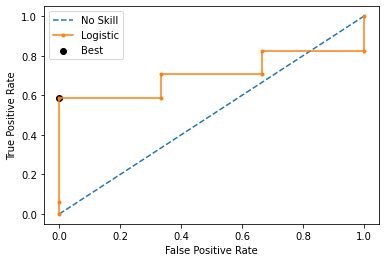

In [88]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot


svc = SVC(class_weight = 'balanced',probability=True)
svc.fit(X_train,y_train)
#ypredtr = svc.predict(X_train)
ypred = svc.predict_proba(X_test)
ypred = ypred[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, ypred)

gmeans = sqrt(tpr * (1-fpr))

ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

#print('train accuracy',accuracy_score(y_train,ypredtr))
#print('test accuracy',accuracy_score(y_test,ypred))
#print(classification_report(y_test,ypred))

In [89]:
svc = SVC(class_weight = 'balanced',probability=True)
svc.fit(X_train,y_train)
#thresh = 0.467917
thresh = 0.551713
ypred = svc.predict_proba(X_test)
probs = ypred[:, 1]
ypred = (probs >= thresh).astype('int')

print(classification_report(y_test,ypred))


              precision    recall  f1-score   support

           0       0.30      1.00      0.46         3
           1       1.00      0.59      0.74        17

    accuracy                           0.65        20
   macro avg       0.65      0.79      0.60        20
weighted avg       0.89      0.65      0.70        20



## 2

In [96]:
dfnew = pd.read_csv('Insurance_Claim_Final_feat.csv')

In [97]:
dfnew.drop('Unnamed: 0',axis = 1,inplace = True)

In [108]:
dfnew.shape

(100, 21)

In [104]:
df = pd.read_excel('insurance claims.xlsx',engine='openpyxl')

In [105]:
df.shape

(100, 24)

In [106]:
df['Fraudulent_Claim_Reason']

0                 Claim before Policy start
1     Claim amount is more than Sum Insured
2                          No Date of birth
3                        No Policy end date
4         Policy end date before start date
                      ...                  
95                       No Policy end date
96                          No kind of loss
97                 No premium but has claim
98                     No Policy start date
99                         No Date of birth
Name: Fraudulent_Claim_Reason, Length: 100, dtype: object

In [107]:
df['Fraudulent_Claim_Reason'].fillna('Unavailable',inplace = True)

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer